In [105]:
# base tool
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows',100)
import numpy as np
from sklearn.model_selection import train_test_split
import copy

import warnings
warnings.filterwarnings('ignore')

#visualization
from IPython.display import display
import matplotlib.pyplot as plt
plt.style.use('default')

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import seaborn as sns    

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
pio.templates.default = "plotly_white"


# model
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.formula.api import logit

from sklearn.ensemble import RandomForestClassifier

#evaluation
from sklearn.metrics import classification_report



In [84]:
def summary(df, pred=None):
    obs = df.shape[0]
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: round(x.isnull().sum()/df.shape[0]*100,2))
    print('Data shape:', df.shape)

    if pred is None:
        cols = [ 'Nulls (%)','Uniques',  'Min', 'Max']
        st = pd.concat([Nulls, Uniques,  Min, Max], axis = 1, sort=True)

    st.columns = cols

    return st

In [85]:
raw_data = pd.read_csv('./국민건강보험공단_건강검진정보_20211229.CSV',encoding='cp949')
raw_data= pd.DataFrame(raw_data)

In [86]:
raw_data.shape

(1000000, 31)

In [87]:
raw_data  = raw_data.iloc[:,3:-1]
raw_data.head(10)

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
0,1,9,165,60,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN
1,2,13,150,65,81.0,0.8,0.8,1.0,1.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN
2,2,12,155,55,70.0,0.6,0.7,1.0,1.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN
3,1,13,160,70,90.8,1.0,1.0,1.0,2.0,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0
4,2,12,155,50,75.2,1.5,1.2,1.0,1.0,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN
5,1,9,185,85,94.0,1.2,1.2,1.0,1.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.0,1.1,25.0,32.0,26.0,3.0,1.0,0,NaN,NaN
6,1,9,165,80,93.0,0.8,0.7,1.0,2.0,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,3.0,1.0,1,0.0,1.0
7,1,13,160,65,92.0,0.5,0.5,1.0,1.0,131.0,79.0,93.0,NaN,NaN,NaN,NaN,15.9,1.0,1.2,18.0,17.0,19.0,3.0,0.0,1,0.0,2.0
8,2,17,150,50,82.0,0.4,0.5,2.0,2.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,1.0,0.7,42.0,48.0,39.0,1.0,0.0,0,NaN,NaN
9,2,14,150,45,71.2,0.8,0.7,2.0,1.0,124.0,83.0,85.0,NaN,NaN,NaN,NaN,13.2,1.0,0.6,22.0,11.0,10.0,1.0,0.0,0,NaN,NaN


In [88]:
summary_df = summary(raw_data)


Data shape: (1000000, 27)


In [89]:
summary_df =  summary_df.sort_values(by='Nulls (%)',ascending=False)
summary_df_temp = summary_df.iloc[6:,:]
summary_df_temp =  summary_df_temp.sort_values(by='Uniques',ascending=False)
summary_df =  pd.concat([summary_df.iloc[:6,:],summary_df_temp])
summary_df['dtype'] = summary_df['Uniques'].map(lambda x: '연속형' if x>=10 else '명목형' )
summary_df['GVIF'] = ['-','-','-','-','-','-',1.38,4.15,2.76,2.69,1.10,1.76,1.33,2.32,2.23,1.09,1.09,6.04,3.56,1.96,'-',1.45,1.46,1.62,1.30,3.69,'-']
ty = summary_df.loc['요단백',:]
summary_df= summary_df.drop(index=['요단백'])
for col in list(summary_df.columns)[1:]:
    summary_df[col] = ['-'  if summary_df['GVIF'][idx] =='-' else x  for idx, x in enumerate(summary_df[col])]
summary_df=summary_df.append(ty)
summary_df
# summary_df.merge(ty)

,Nulls (%),Uniques,Min,Max,dtype,GVIF
치아우식증유무,66.86,-,-,-,-,-
치석,66.86,-,-,-,-,-
LDL 콜레스테롤,60.55,-,-,-,-,-
HDL 콜레스테롤,59.77,-,-,-,-,-
트리글리세라이드,59.77,-,-,-,-,-
총 콜레스테롤,59.77,-,-,-,-,-
감마 지티피,0.76,972,1,2630,연속형,1.38
허리둘레,0.01,778,5.8,999,연속형,4.15
(혈청지오티)ALT,0.76,638,1,5990,연속형,2.76
(혈청지오티)AST,0.76,581,1,8712,연속형,2.69


# 독립 vs 종속 유의성 검정 

In [12]:
con_col = list(summary_df[summary_df['dtype'] == '연속형'].index)
cat_col = list(summary_df[summary_df['dtype'] == '명목형'].index)

# 요단백 예측

In [13]:
raw_data = raw_data.dropna(subset=['요단백'])
raw_data['요단백'].value_counts()

1.0    914825
2.0     39974
3.0     22219
4.0      7652
5.0      2465
6.0       724
Name: 요단백, dtype: int64

# 두개 로 나누기 (아마 3개로 나누는것이 좋을거 같다)

In [14]:
# 요단백 1->0 (정상), 2,3,4,5,6 ->1 (비정상)
raw_data.replace({'요단백':{1:0,2:1,3:1,4:1,5:1,6:1}},inplace=True)
raw_data['요단백'].value_counts()

0.0    914825
1.0     73034
Name: 요단백, dtype: int64

In [15]:
# # 요단백 1->0 (정상), 2,3->1 (검사요방),4,5,6 ->2 (비정상)
# raw_data.replace({'요단백':{1:0,2:1,3:1,4:2,5:2,6:2}},inplace=True)
# raw_data['요단백'].value_counts()

In [16]:
# null 이 많은 '구강검진 수검여부','치아우식증유무','치석','총 콜레스테롤','HDL 콜레스테롤','LDL 콜레스테롤','트리글리세라이드' 제거
raw_data =  raw_data.drop(columns=['구강검진 수검여부','치아우식증유무','치석','총 콜레스테롤','HDL 콜레스테롤','LDL 콜레스테롤','트리글리세라이드'])

In [17]:
summary(raw_data)

Data shape: (987859, 20)


,Nulls (%),Uniques,Min,Max
(혈청지오티)ALT,0.00,637,1.0,5990.0
(혈청지오티)AST,0.00,579,1.0,8712.0
감마 지티피,0.00,971,1.0,2630.0
성별코드,0.00,2,1.0,2.0
수축기 혈압,0.00,174,65.0,260.0
시력(우),0.02,25,0.1,9.9
시력(좌),0.02,25,0.1,9.9
식전혈당(공복혈당),0.00,490,1.0,950.0
신장(5Cm단위),0.00,14,130.0,195.0
연령대 코드(5세단위),0.00,10,9.0,18.0


In [18]:
# 결측치 처리 전에 다 제거 후 분석 가능한지 확인
raw_data =  raw_data.dropna()
raw_data.shape

(986916, 20)

In [19]:
raw_data['요단백'].value_counts()

0.0    914039
1.0     72877
Name: 요단백, dtype: int64

In [20]:
summary(raw_data)

Data shape: (986916, 20)


,Nulls (%),Uniques,Min,Max
(혈청지오티)ALT,0.0,636,1.0,5990.0
(혈청지오티)AST,0.0,578,1.0,8712.0
감마 지티피,0.0,970,1.0,2630.0
성별코드,0.0,2,1.0,2.0
수축기 혈압,0.0,173,65.0,260.0
시력(우),0.0,24,0.1,9.9
시력(좌),0.0,24,0.1,9.9
식전혈당(공복혈당),0.0,489,1.0,950.0
신장(5Cm단위),0.0,14,130.0,195.0
연령대 코드(5세단위),0.0,10,9.0,18.0


In [21]:
summary_df

,Nulls (%),Uniques,Min,Max,dtype,GVIF
치아우식증유무,66.86,-,-,-,-,-
치석,66.86,-,-,-,-,-
LDL 콜레스테롤,60.55,-,-,-,-,-
HDL 콜레스테롤,59.77,-,-,-,-,-
트리글리세라이드,59.77,-,-,-,-,-
총 콜레스테롤,59.77,-,-,-,-,-
감마 지티피,0.76,972,1,2630,연속형,1.38
허리둘레,0.01,778,5.8,999,연속형,4.15
(혈청지오티)ALT,0.76,638,1,5990,연속형,2.76
(혈청지오티)AST,0.76,581,1,8712,연속형,2.69


In [22]:
from imblearn.under_sampling import RandomUnderSampler
X,y = RandomUnderSampler(random_state=0).fit_resample(raw_data.drop(columns=['요단백']),raw_data['요단백'])

## 독립 종속 유의성 검정 (2)

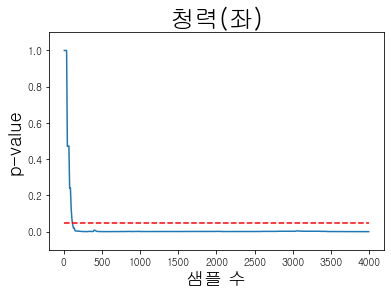

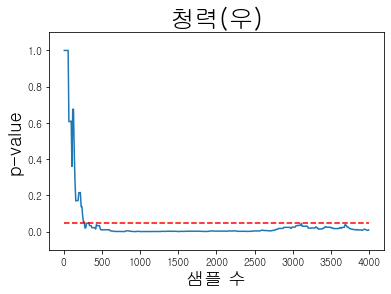

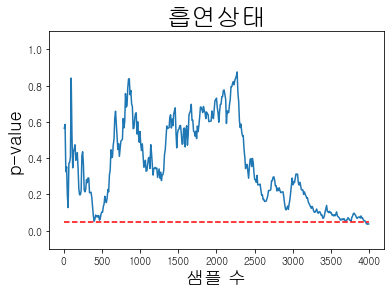

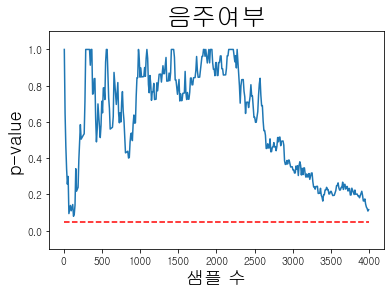

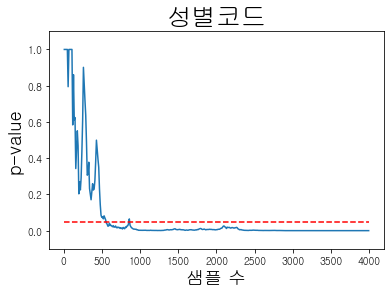

In [107]:
start=X.shape[0]//2
ns=range(5,2000,5)
x_axis = [2*x for x in list(ns)]
cat_x = X.loc[:,cat_col]

for col in cat_x.columns:
    l =[]

    for n in ns:
        tmpx = cat_x.iloc[start-n:start+n]
        tmpy = y[start-n:start+n]

        # 명목형 독립변수

        
        ct = pd.crosstab(cat_x[col],tmpy)
        l.append(round(chi2_contingency(ct)[1],5))
            # print(ct)
    # plt.axes().set_facecolor("white")
    plt.title(col,fontsize=25)

    plt.xlabel('샘플 수',fontsize=18)
    plt.ylabel('p-value',fontsize=18)
    plt.ylim(-.1,1.1)
    plt.plot(x_axis,l)
    plt.plot(x_axis,[0.05]*len(x_axis),'r--')
    plt.show()

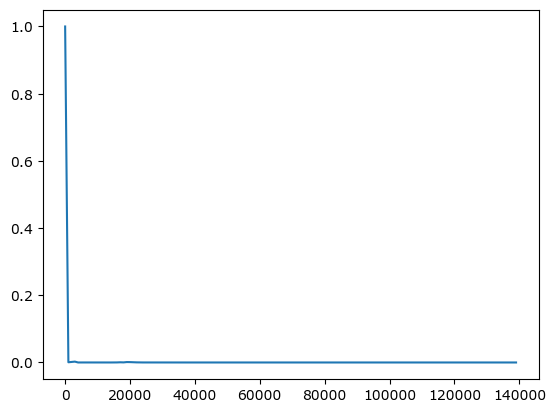

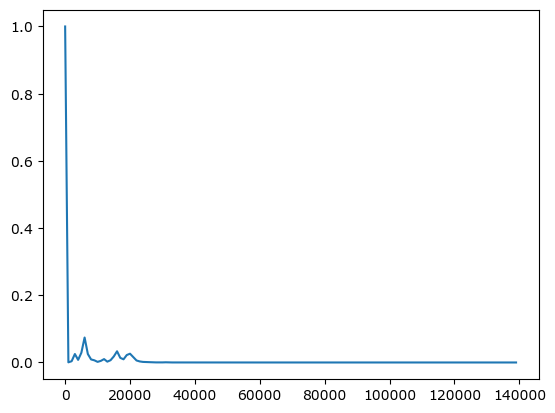

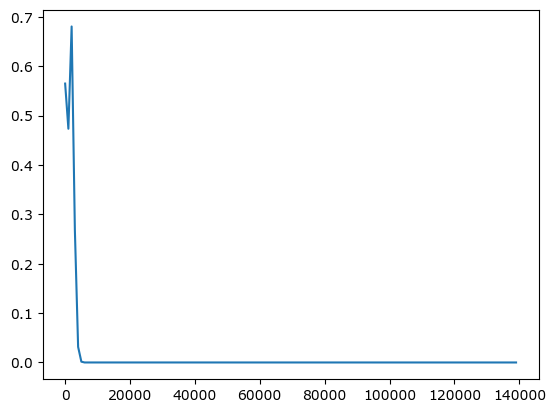

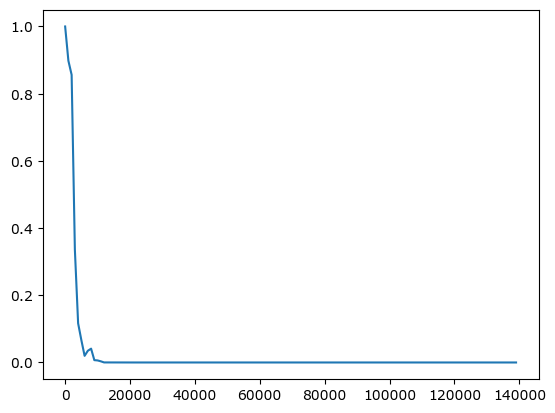

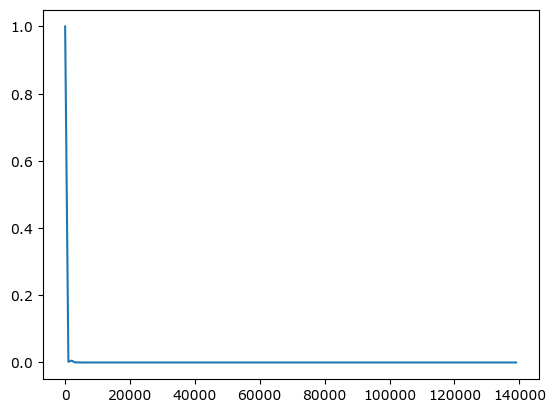

In [ ]:
start=X.shape[0]//2
ns=range(5,70000,500)
x_axis = [2*x for x in list(ns)]
cat_x = X.loc[:,cat_col]

for col in cat_x.columns:
    l =[]

    for n in ns:
        tmpx = cat_x.iloc[start-n:start+n]
        tmpy = y[start-n:start+n]

        # 명목형 독립변수

        
        ct = pd.crosstab(cat_x[col],tmpy)
        l.append(round(chi2_contingency(ct)[1],5))
            # print(ct)
    # plt.axes().set_facecolor("white")
    plt.plot(x_axis,l)
    plt.show()

In [102]:
con_x = X.loc[:,con_col]

In [103]:
tmp = con_x.merge(y,left_index=True,right_index=True)
tmp = tmp.corr()
tmp  = tmp.loc[:,['요단백']].round(2)
tmp.T

,감마 지티피,허리둘레,(혈청지오티)ALT,(혈청지오티)AST,식전혈당(공복혈당),혈색소,혈청크레아티닌,수축기 혈압,이완기 혈압,시력(우),시력(좌),체중(5Kg 단위),신장(5Cm단위),연령대 코드(5세단위),요단백
요단백,0.09,0.11,0.06,0.05,0.15,0.07,0.11,0.08,0.07,-0.01,-0.0,0.09,0.06,0.01,1.0


In [99]:
tmp = summary_df.T
tmp

,치아우식증유무,치석,LDL 콜레스테롤,HDL 콜레스테롤,트리글리세라이드,총 콜레스테롤,감마 지티피,허리둘레,(혈청지오티)ALT,(혈청지오티)AST,식전혈당(공복혈당),혈색소,혈청크레아티닌,수축기 혈압,이완기 혈압,시력(우),시력(좌),체중(5Kg 단위),신장(5Cm단위),연령대 코드(5세단위),청력(좌),청력(우),흡연상태,음주여부,성별코드,구강검진 수검여부,요단백
Nulls (%),66.86,66.86,60.55,59.77,59.77,59.77,0.76,0.01,0.76,0.76,0.76,0.76,0.76,0.75,0.75,0.03,0.03,0,0,0,0.02,0.02,0.03,0.02,0,0,1.21
Uniques,-,-,-,-,-,-,972,778,638,581,492,197,189,175,127,25,25,22,14,10,4,4,4,3,2,-,7
Min,-,-,-,-,-,-,1,5.8,1,1,1,1,0,64,30,0.1,0.1,30,130,9,1,1,1,0,1,-,1
Max,-,-,-,-,-,-,2630,999,5990,8712,950,25,95,260,190,9.9,9.9,135,195,18,3,3,3,1,2,-,6
dtype,-,-,-,-,-,-,연속형,연속형,연속형,연속형,연속형,연속형,연속형,연속형,연속형,연속형,연속형,연속형,연속형,연속형,명목형,명목형,명목형,명목형,명목형,-,명목형
GVIF,-,-,-,-,-,-,1.38,4.15,2.76,2.69,1.1,1.76,1.33,2.32,2.23,1.09,1.09,6.04,3.56,1.96,1.45,1.46,1.62,1.3,3.69,-,-


In [100]:
tmp = tmp.iloc[:,6:-2].merge(tmp.iloc[:,-1],left_index=True,right_index=True)
tmp

,감마 지티피,허리둘레,(혈청지오티)ALT,(혈청지오티)AST,식전혈당(공복혈당),혈색소,혈청크레아티닌,수축기 혈압,이완기 혈압,시력(우),시력(좌),체중(5Kg 단위),신장(5Cm단위),연령대 코드(5세단위),청력(좌),청력(우),흡연상태,음주여부,성별코드,요단백
Nulls (%),0.76,0.01,0.76,0.76,0.76,0.76,0.76,0.75,0.75,0.03,0.03,0,0,0,0.02,0.02,0.03,0.02,0,1.21
Uniques,972,778,638,581,492,197,189,175,127,25,25,22,14,10,4,4,4,3,2,7
Min,1,5.8,1,1,1,1,0,64,30,0.1,0.1,30,130,9,1,1,1,0,1,1
Max,2630,999,5990,8712,950,25,95,260,190,9.9,9.9,135,195,18,3,3,3,1,2,6
dtype,연속형,연속형,연속형,연속형,연속형,연속형,연속형,연속형,연속형,연속형,연속형,연속형,연속형,연속형,명목형,명목형,명목형,명목형,명목형,명목형
GVIF,1.38,4.15,2.76,2.69,1.1,1.76,1.33,2.32,2.23,1.09,1.09,6.04,3.56,1.96,1.45,1.46,1.62,1.3,3.69,-


## 로지스틱 귀회

In [88]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

In [ ]:
train_cat = ohe.fit_transform(train[['cat1']])
train_cat

In [89]:
t.columns

Index(['성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '혈색소',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부', '요단백'],
      dtype='object')

In [96]:
t

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,요단백
0,1,12,160,70,89.0,1.0,0.8,1.0,1.0,125.0,90.0,105.0,15.0,1.0,26.0,22.0,33.0,2.0,0.0,0.0
1,1,11,165,85,90.2,1.2,1.0,1.0,1.0,130.0,80.0,157.0,15.7,0.9,17.0,29.0,48.0,1.0,0.0,0.0
2,1,15,160,55,90.0,0.5,0.4,1.0,1.0,110.0,80.0,111.0,14.0,0.9,11.0,18.0,19.0,3.0,1.0,0.0
3,1,15,150,55,89.0,0.7,1.0,1.0,1.0,146.0,76.0,134.0,14.8,1.0,28.0,27.0,20.0,2.0,1.0,0.0
4,2,13,145,50,72.0,0.7,0.7,2.0,2.0,130.0,70.0,87.0,14.3,0.7,26.0,13.0,14.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145749,2,9,150,50,72.0,1.2,0.9,1.0,1.0,123.0,70.0,95.0,14.2,0.7,18.0,11.0,12.0,1.0,1.0,1.0
145750,1,9,170,75,89.0,1.5,1.2,1.0,1.0,124.0,86.0,107.0,16.8,1.0,20.0,35.0,34.0,3.0,0.0,1.0
145751,2,15,155,75,105.6,0.5,1.0,1.0,1.0,147.0,86.0,135.0,14.5,0.7,56.0,42.0,86.0,1.0,0.0,1.0
145752,1,11,160,70,85.0,1.2,1.2,1.0,1.0,108.0,51.0,153.0,15.3,1.0,18.0,17.0,22.0,3.0,1.0,1.0


In [99]:
X_add0 = sm.add_constant(X)
logit_mod = sm.Logit(y, X_add0)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

In [29]:
# 모델 성능평가 # 맥파이든
from sklearn.metrics import log_loss
y_hat = logit_res.predict(X_add0)
log_loss(y, y_hat, normalize=False)
mu_null = np.sum(y) / len(y)
y_null = np.ones_like(y) * mu_null
log_loss(y, y_null, normalize=False)
print(1 - (log_loss(y, y_hat) / log_loss(y, y_null)))

0.04019023659320686


In [34]:
classification_report(y,logit_res.predict(X_add0))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [36]:
y_hat

0         0.497238
1         0.574303
2         0.447542
3         0.577491
4         0.450554
            ...   
145749    0.437220
145750    0.541508
145751    0.643277
145752    0.583072
145753    0.445747
Length: 145754, dtype: float64

In [35]:
logit_res.predict(X_add0)

0         0.497238
1         0.574303
2         0.447542
3         0.577491
4         0.450554
            ...   
145749    0.437220
145750    0.541508
145751    0.643277
145752    0.583072
145753    0.445747
Length: 145754, dtype: float64

In [ ]:
X1 = dt3[["x1"]].copy()
X2 = patsy.dmatrix("0 + C(age)", age, return_type = "dataframe").iloc[:, 1:]
X2 = pd.concat([X2.reset_index(drop = True), dt3[["x3_new"]]], axis = 1)
#
tmp_gvif = np.linalg.det(X1.corr()) * np.linalg.det(X2.corr()) / np.linalg.det(pd.concat([X1.reset_index(drop = True), X2], axis = 1).corr())
tmp_gvif = pd.DataFrame([tmp_gvif], columns = ["GVIF"])
tmp_gvif["GVIF^(1/2Df)"] = np.power(tmp_gvif["GVIF"], 1 / (2 * len(X1.columns)))
print(tmp_gvif)

In [131]:
# from sklearn.preprocessing import minmax_scale
# X = minmax_scale(X)

In [132]:
# from sklearn.decomposition import PCA
# pca  = PCA(n_components=3)
# p = pca.fit_transform(X)

# labels = {
#     str(i): f"PC {i+1} ({var:.1f}%)"
#     for i, var in enumerate(pca.explained_variance_ratio_ * 100)
# }

# fig = px.scatter_matrix(
#     X,
#     labels=labels,
#     dimensions=range(4),
#     color=y
# )
# fig.update_traces(diagonal_visible=False)
# fig.show()





# X = pd.DataFrame(data=p, columns = ['principal component1', 'principal component2','principal component3'])

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [134]:
rf = RandomForestClassifier(max_depth=10,n_jobs=-1)
rf.fit(X_train,y_train)
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

In [135]:
print(classification_report(y_train,train_pred))
print()
print(classification_report(y_test,test_pred))


              precision    recall  f1-score   support

         0.0       0.60      0.77      0.68     54576
         1.0       0.69      0.49      0.57     54739

    accuracy                           0.63    109315
   macro avg       0.64      0.63      0.63    109315
weighted avg       0.64      0.63      0.63    109315


              precision    recall  f1-score   support

         0.0       0.58      0.74      0.65     18301
         1.0       0.64      0.47      0.54     18138

    accuracy                           0.60     36439
   macro avg       0.61      0.60      0.60     36439
weighted avg       0.61      0.60      0.60     36439



In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_train,train_pred))
print()
print(classification_report(y_test,test_pred))


              precision    recall  f1-score   support

         0.0       0.60      0.51      0.55     54746
         1.0       0.58      0.66      0.62     54569

    accuracy                           0.59    109315
   macro avg       0.59      0.59      0.58    109315
weighted avg       0.59      0.59      0.58    109315


              precision    recall  f1-score   support

         0.0       0.55      0.47      0.51     18131
         1.0       0.54      0.62      0.58     18308

    accuracy                           0.55     36439
   macro avg       0.55      0.55      0.55     36439
weighted avg       0.55      0.55      0.55     36439

